Airline satisfaction - using DecisionTreeClassifier, RandomForestClassifier and KNeighborsClassifier.
Comparison and rating.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import neighbors, metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [2]:
train= pd.read_csv('train_plane.csv')
test = pd.read_csv('test_plane.csv')

In [3]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [5]:
df = pd.concat([train,test])
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129880.0,44158.700000,31207.377062,0.0,16234.75,38963.5,71433.25,103903.0
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [8]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [9]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

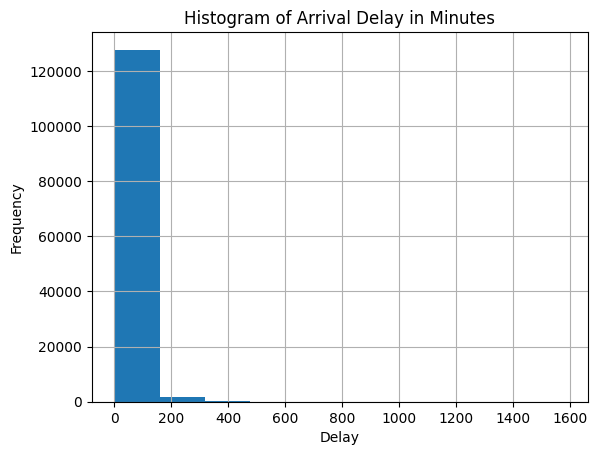

In [10]:
df['Arrival Delay in Minutes'].hist()
plt.xlabel('Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Arrival Delay in Minutes')
plt.show()

Correlation Matrix:
                                        Age  Flight Distance  \
Age                                1.000000         0.099459   
Flight Distance                    0.099459         1.000000   
Inflight wifi service              0.016116         0.006701   
Departure/Arrival time convenient  0.036960        -0.018914   
Ease of Online booking             0.022565         0.065165   
Gate location                     -0.000398         0.005520   
Food and drink                     0.023194         0.057066   
Online boarding                    0.207572         0.214825   
Seat comfort                       0.159136         0.157662   
Inflight entertainment             0.074947         0.130507   
On-board service                   0.057078         0.111194   
Leg room service                   0.039119         0.134533   
Baggage handling                  -0.047991         0.064855   
Checkin service                    0.033475         0.073608   
Inflight service    

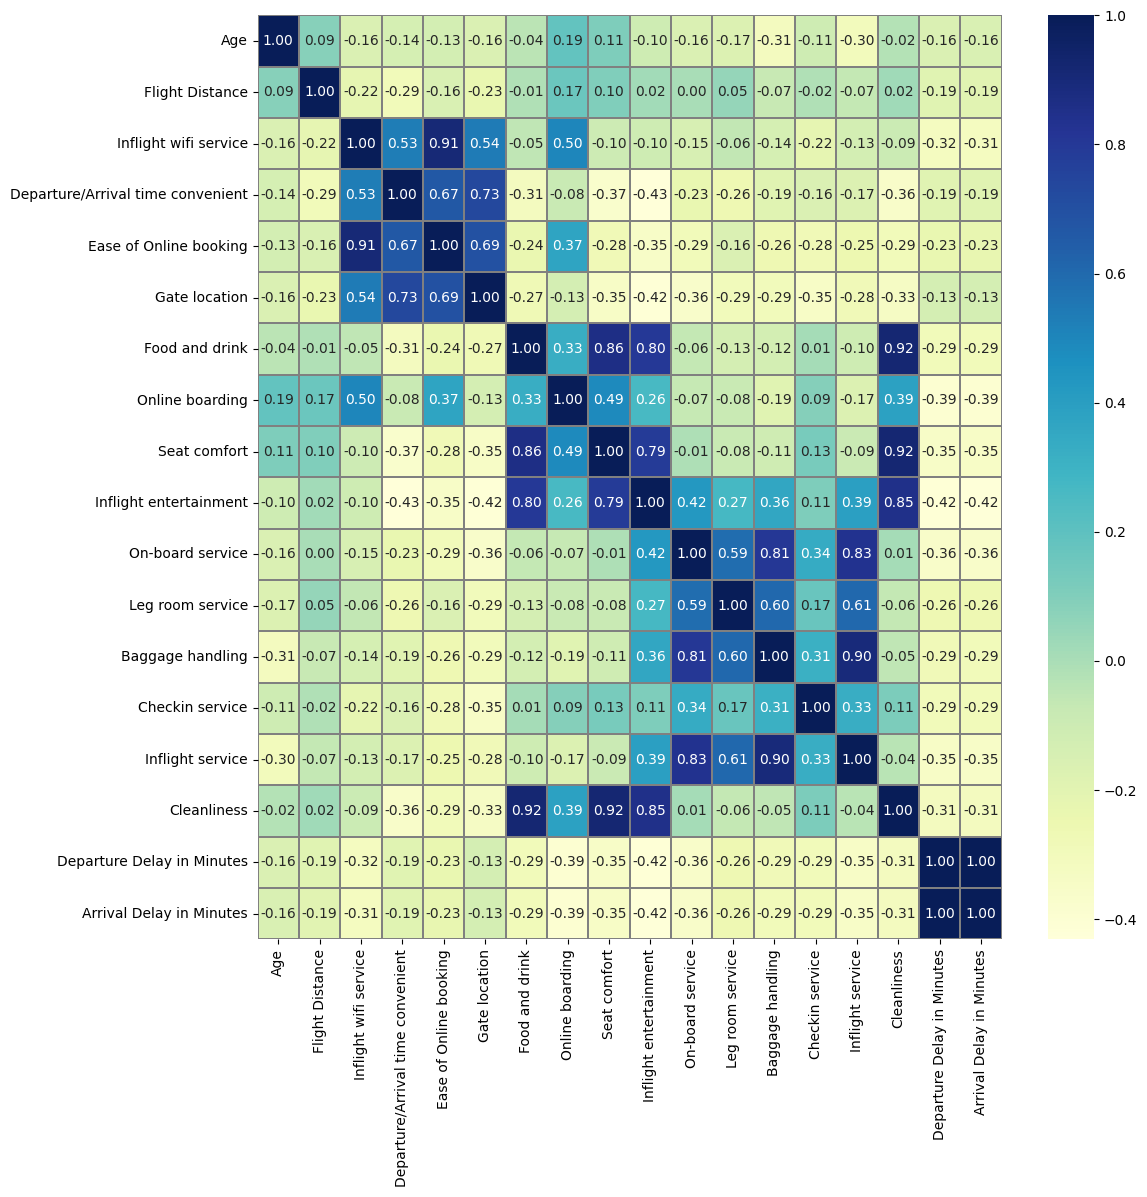

In [11]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix.corr(), annot=True,fmt=".2f" ,linewidths=0.3, linecolor="grey",cmap='YlGnBu')
plt.show()

Departure Delay and Arrival Delay are highly correlated, so I'll delete arrival delay. (Also because arrival delay has a lot of missing data)

In [12]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [13]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

<Axes: >

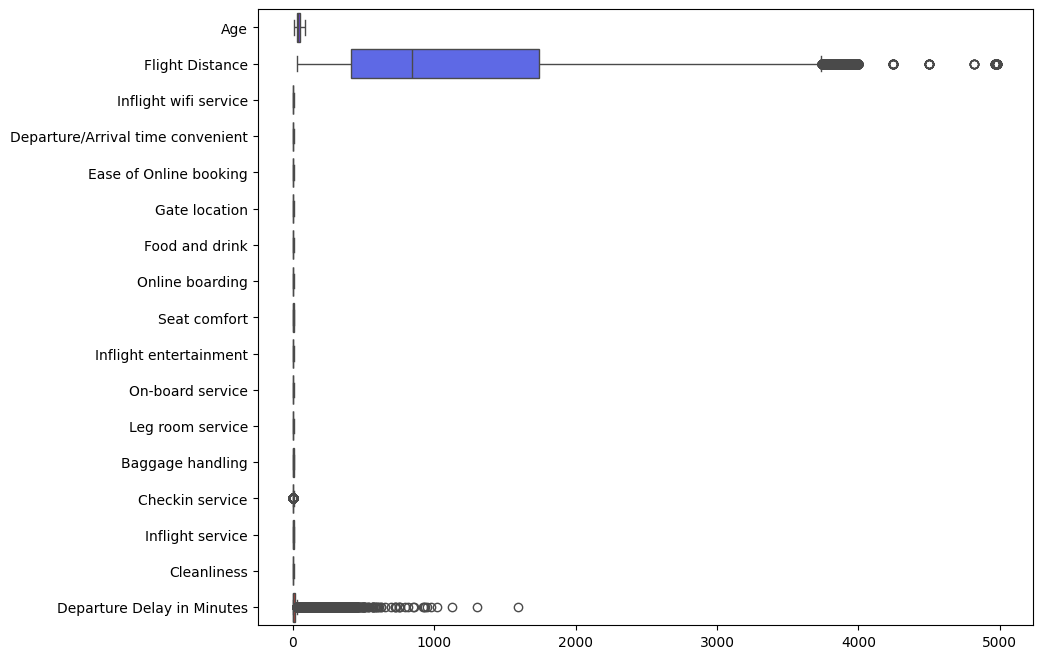

In [14]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.boxplot(ax=ax, data=df.loc[:,df.columns != 'satisfaction'], orient='h', palette='rainbow')

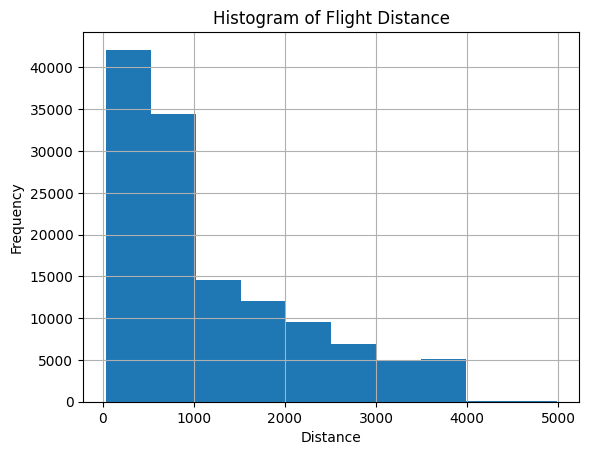

In [15]:
df['Flight Distance'].hist()
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Distance')
plt.show()

There aren't any unusual outliers in my interpretation.

In [16]:
for col_name in df.columns:
    if df[col_name].dtypes == 'object':
        unique_cat = len(df[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Gender' has 2 unique categories
Feature 'Customer Type' has 2 unique categories
Feature 'Type of Travel' has 2 unique categories
Feature 'Class' has 3 unique categories
Feature 'satisfaction' has 2 unique categories


Changing to numerical values

In [17]:
gender = df['Gender'].unique()
c_type = df['Customer Type'].unique()
t_travel = df['Type of Travel'].unique()
u_class = df['Class'].unique()

In [18]:
def assign_numeric(value, unique_values):
    return list(unique_values).index(value)

df['gender_num'] = df['Gender'].apply(lambda x: assign_numeric(x, gender))
df['customer_type__num'] = df['Customer Type'].apply(lambda x: assign_numeric(x, c_type))
df['type_of_travel_num'] = df['Type of Travel'].apply(lambda x: assign_numeric(x, t_travel))
df['class_num'] = df['Class'].apply(lambda x: assign_numeric(x, u_class))

In [19]:
df_num = df.select_dtypes(include=['number'])
df_num.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,gender_num,customer_type__num,type_of_travel_num,class_num
0,13,460,3,4,3,1,5,3,5,5,...,3,4,4,5,5,25,0,0,0,0
1,25,235,3,2,3,3,1,3,1,1,...,5,3,1,4,1,1,0,1,1,1
2,26,1142,2,2,2,2,5,5,5,5,...,3,4,4,4,5,0,1,0,1,1
3,25,562,2,5,5,5,2,2,2,2,...,5,3,1,4,2,11,1,0,1,1
4,61,214,3,3,3,3,4,5,5,3,...,4,4,3,3,3,0,0,0,1,1


Correlation Matrix:
                                        Age  Flight Distance  \
Age                                1.000000         0.099459   
Flight Distance                    0.099459         1.000000   
Inflight wifi service              0.016116         0.006701   
Departure/Arrival time convenient  0.036960        -0.018914   
Ease of Online booking             0.022565         0.065165   
Gate location                     -0.000398         0.005520   
Food and drink                     0.023194         0.057066   
Online boarding                    0.207572         0.214825   
Seat comfort                       0.159136         0.157662   
Inflight entertainment             0.074947         0.130507   
On-board service                   0.057078         0.111194   
Leg room service                   0.039119         0.134533   
Baggage handling                  -0.047991         0.064855   
Checkin service                    0.033475         0.073608   
Inflight service    

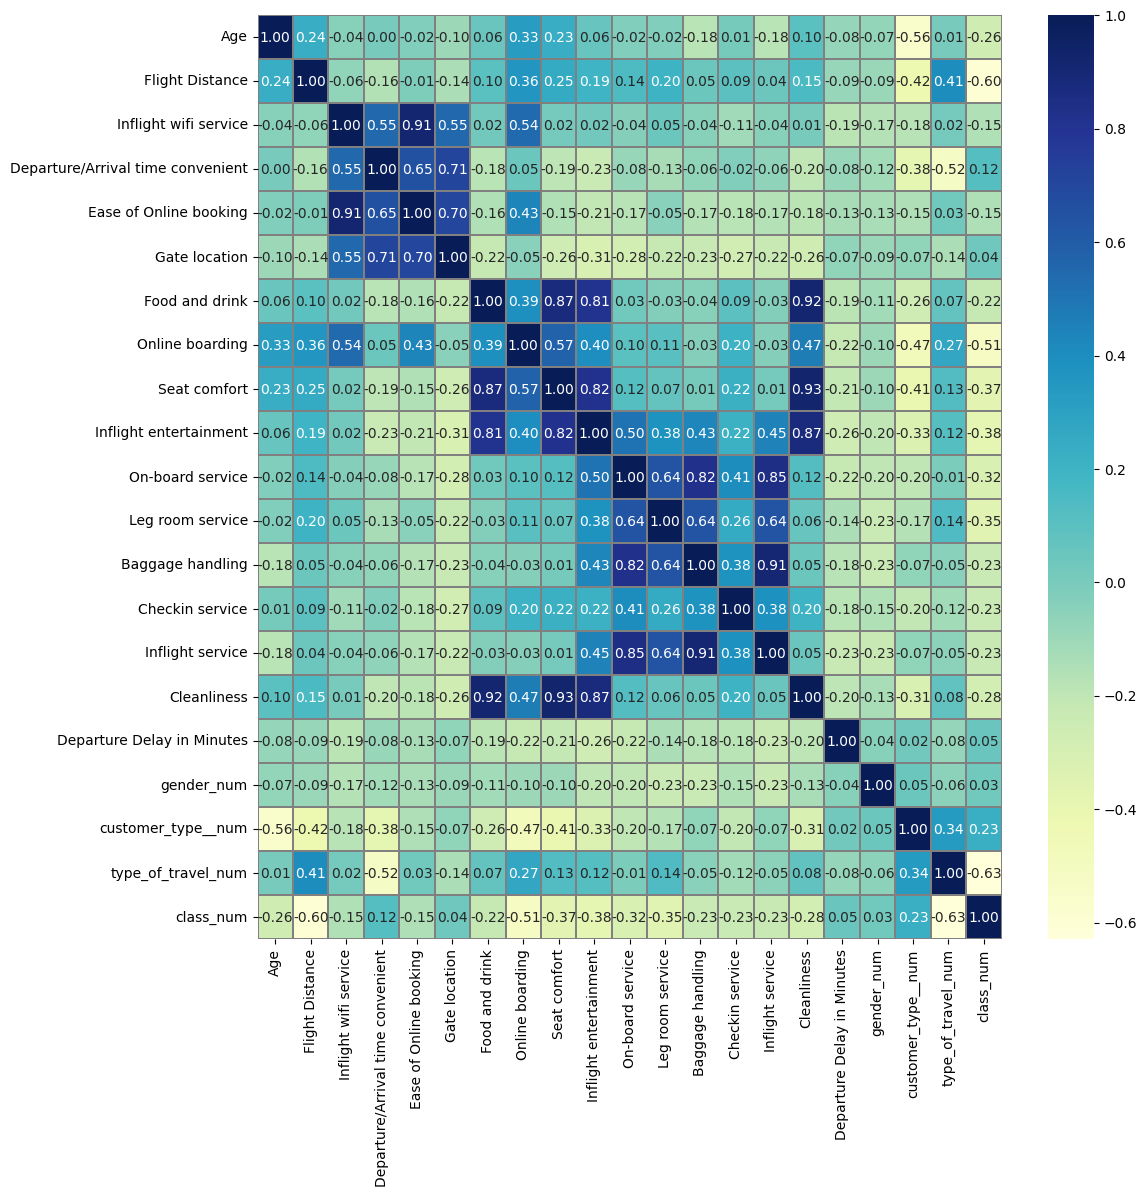

In [20]:
correlation_matrix = df_num.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix.corr(), annot=True,fmt=".2f" ,linewidths=0.3, linecolor="grey",cmap='YlGnBu')
plt.show()

Columns are highly correlated so I'll be performing PCA.

In [21]:
X = df_num
y = df['satisfaction']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

PCA()

In [23]:
pca.explained_variance_ratio_

array([0.1895623 , 0.11319207, 0.10493791, 0.07944685, 0.07163769,
       0.04900919, 0.04751887, 0.04606636, 0.04400899, 0.03891326,
       0.03399799, 0.03224477, 0.02289258, 0.02209242, 0.02059704,
       0.01743074, 0.01697718, 0.01520268, 0.01393671, 0.01187101,
       0.00846339])

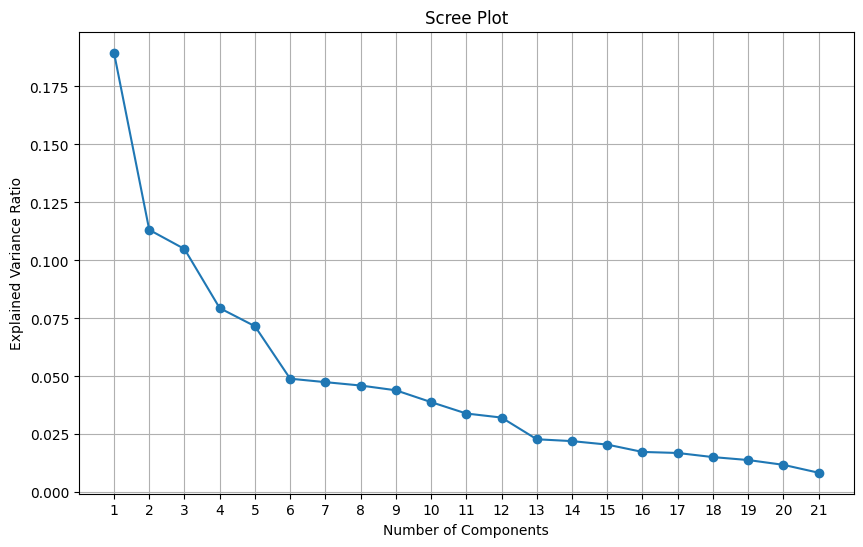

In [24]:
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(np.arange(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

I'm choosing 10 components in order to shorten the run time of algorithms.

In [25]:
pca_optimal = PCA(n_components=10)
X_pca_optimal = pd.DataFrame(pca_optimal.fit_transform(X_scaled))
X_pca_optimal.head()

,0,1,2,3,4,5,6,7,8,9
0,-2.176710,1.193420,0.041097,1.475125,0.081276,0.827414,-0.276255,0.207610,-1.424431,1.213995
1,3.287057,-1.029786,-1.412649,-1.902130,2.053005,0.641815,-0.985475,0.662470,0.956303,0.454035
2,-2.271147,1.898782,0.993331,-0.031683,0.463163,-1.041807,0.254615,-0.414509,-0.510843,0.646906
3,1.665994,-2.449246,-0.718418,-0.637264,0.521631,0.660402,0.087234,-2.178238,0.674190,0.179446
4,-0.980399,-0.266129,1.002799,-0.627355,-0.566464,0.091059,-0.778898,1.251264,0.899891,-0.932989


In [26]:
pca_optimal.explained_variance_ratio_.sum()

0.784293431997352

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y, train_size=0.80, random_state=42)

In [28]:
print(df_num.shape)
print(X_pca_optimal.shape)

(129880, 21)
(129880, 10)


rfc

In [29]:
values = [i for i in range(1, 15)]
train_scores, test_scores = list(), list()

In [30]:
for i in values:
    
    model = RandomForestClassifier(n_estimators=100, max_depth=i)
    
    model.fit(X_train, y_train)
 
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.815, test: 0.814
>2, train: 0.839, test: 0.839
>3, train: 0.850, test: 0.851
>4, train: 0.863, test: 0.862
>5, train: 0.871, test: 0.870
>6, train: 0.882, test: 0.880
>7, train: 0.894, test: 0.889
>8, train: 0.902, test: 0.894
>9, train: 0.910, test: 0.900
>10, train: 0.916, test: 0.903
>11, train: 0.924, test: 0.907
>12, train: 0.932, test: 0.909
>13, train: 0.940, test: 0.911
>14, train: 0.950, test: 0.913


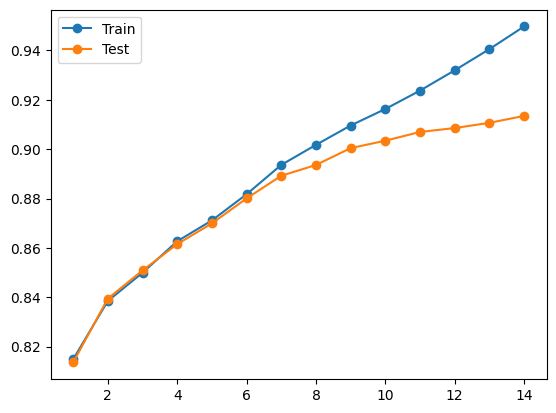

In [31]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

I'm choosing max_depth=10, for higher values the model might be overfitted.

In [53]:
rfc = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


dtc

In [56]:
dtc_clf = tree.DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [4, 6, 8, 10, 12]
}

grid_search = GridSearchCV(estimator=dtc_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_dtc_clf = grid_search.best_estimator_
dtc_prediction = best_dtc_clf.predict(X_test)
print(best_dtc_clf)

DecisionTreeClassifier(max_depth=12, random_state=42)


In [71]:
dtc_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=123)
dtc_clf = dtc_clf.fit(X_train, y_train)
y_pred = dtc_clf.predict(X_test)

In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


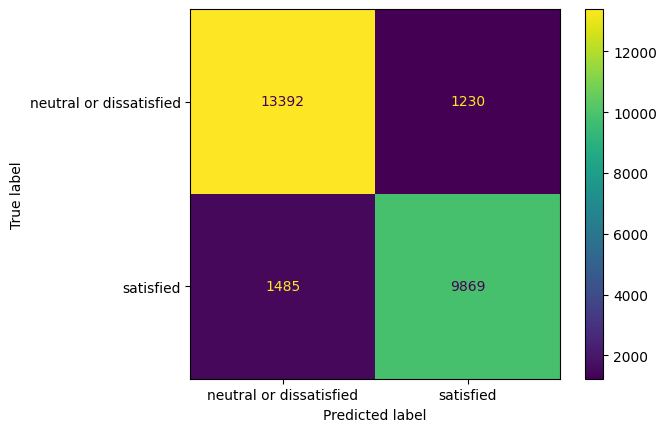

In [73]:
cm = confusion_matrix(y_test,y_pred, labels = dtc_clf.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_ )
disp.plot()

In [58]:
values = [i for i in range(1, 15)]
train_scores, test_scores = list(), list()

In [59]:
for i in values:
    
    model = DecisionTreeClassifier(max_depth=i)
    
    model.fit(X_train, y_train)
 
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.782, test: 0.783
>2, train: 0.831, test: 0.830
>3, train: 0.842, test: 0.840
>4, train: 0.856, test: 0.853
>5, train: 0.866, test: 0.861
>6, train: 0.877, test: 0.869
>7, train: 0.883, test: 0.876
>8, train: 0.893, test: 0.882
>9, train: 0.903, test: 0.887
>10, train: 0.911, test: 0.891
>11, train: 0.920, test: 0.894
>12, train: 0.929, test: 0.895
>13, train: 0.937, test: 0.895
>14, train: 0.946, test: 0.893


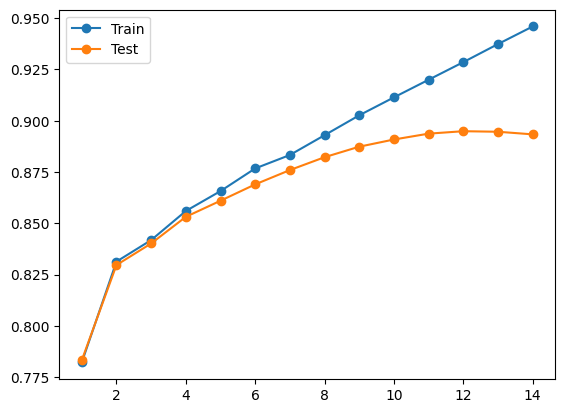

In [60]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [67]:
dtc_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dtc_clf = dtc_clf.fit(X_train, y_train)
y_pred = dtc_clf.predict(X_test)

In [68]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


max_depth=12 is slightly better

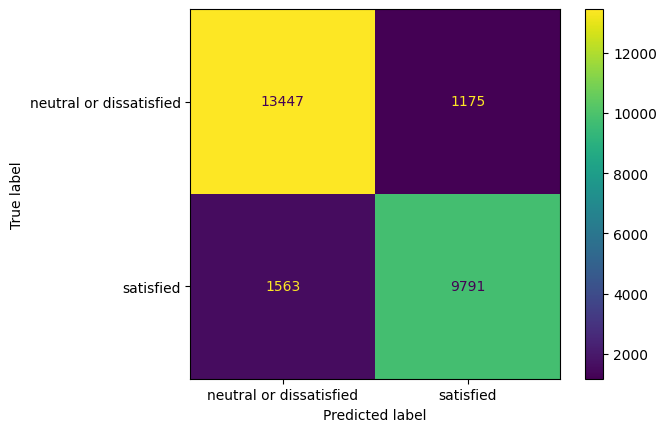

In [69]:
cm = confusion_matrix(y_test,y_pred, labels = dtc_clf.classes_ )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_clf.classes_ )
disp.plot()

knn

In [74]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [46]:
values = [i for i in range(1, 50, 3)]
train_scores, test_scores = list(), list()

In [47]:
for i in values:
  
    model = KNeighborsClassifier(n_neighbors=i)
   
    model.fit(X_train_scaled, y_train)
   
    train_yhat = model.predict(X_train_scaled)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
  
    test_yhat = model.predict(X_test_scaled)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
   
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 1.000, test: 0.895
>4, train: 0.934, test: 0.905
>7, train: 0.930, test: 0.913
>10, train: 0.924, test: 0.911
>13, train: 0.923, test: 0.914
>16, train: 0.920, test: 0.913
>19, train: 0.920, test: 0.914
>22, train: 0.918, test: 0.912
>25, train: 0.918, test: 0.913
>28, train: 0.916, test: 0.911
>31, train: 0.916, test: 0.912
>34, train: 0.915, test: 0.911
>37, train: 0.915, test: 0.911
>40, train: 0.914, test: 0.910
>43, train: 0.914, test: 0.911
>46, train: 0.913, test: 0.910
>49, train: 0.913, test: 0.910


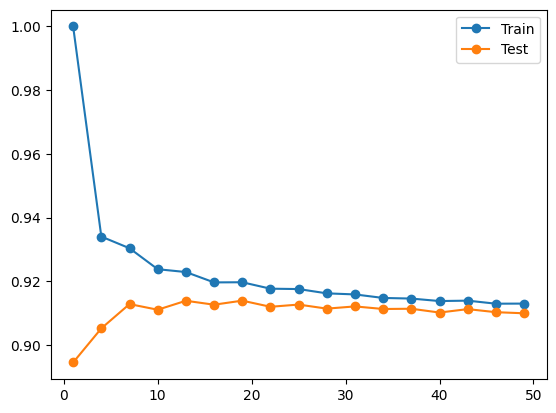

In [48]:
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [79]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [80]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.91


KNN performed the best